In [ ]:
!pip install tensorflow pandas

In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
train_df = pd.read_csv('/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/train/_annotations.csv')
test_df = pd.read_csv('/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/test/_annotations.csv')
valid_df = pd.read_csv('/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/valid/_annotations.csv')


In [4]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [12]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/train',
    x_col='filename',
    y_col='class',
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical'
)

Found 28518 validated image filenames belonging to 6 classes.


In [13]:
valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid_df,
    directory='/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/valid',
    x_col='filename',
    y_col='class',
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical'
)

Found 3581 validated image filenames belonging to 6 classes.


In [14]:
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/kaggle/input/brackish-tf/Brackish 960x540.tensorflow/test',
    x_col='filename',
    y_col='class',
    target_size=(180, 180),
    batch_size=64,
    class_mode='categorical'
)


Found 3466 validated image filenames belonging to 6 classes.


In [15]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(460, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(58, activation='relu')(x)
x = Dense(188, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False
    # Define the optimizer with a custom learning rate
    custom_learning_rate = 0.0003102
    optimizer = Adam(learning_rate=custom_learning_rate)

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 460)            │     5,888,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 460)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 58)             │        26,738 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 188)            │        11,092 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │         1,13

 Total params: 20,642,112 (78.74 MB)

 Trainable params: 5,927,424 (22.61 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [18]:
# 
history_vgg16 = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.n // valid_generator.batch_size,
    epochs=10
)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/445 ━━━━━━━━━━━━━━━━━━━━ 5:40:06 46s/step - accuracy: 0.0156 - loss: 4.2469

I0000 00:00:1718036638.387389     372 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718036638.408230     372 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 16/445 ━━━━━━━━━━━━━━━━━━━━ 14:14 2s/step - accuracy: 0.2772 - loss: 4.7572  

W0000 00:00:1718036668.331340     373 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5771 - loss: 1.5547

W0000 00:00:1718036769.721287     374 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


445/445 ━━━━━━━━━━━━━━━━━━━━ 189s 323ms/step - accuracy: 0.5773 - loss: 1.5534 - val_accuracy: 0.7526 - val_loss: 0.5925
Epoch 2/10
  1/445 ━━━━━━━━━━━━━━━━━━━━ 1:14 168ms/step - accuracy: 0.7656 - loss: 0.5046

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


445/445 ━━━━━━━━━━━━━━━━━━━━ 38s 86ms/step - accuracy: 0.7656 - loss: 0.5046 - val_accuracy: 0.7541 - val_loss: 0.5326
Epoch 3/10


W0000 00:00:1718036820.055138     373 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


445/445 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.7445 - loss: 0.6321 - val_accuracy: 0.7733 - val_loss: 0.5535
Epoch 4/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8125 - loss: 0.5854 - val_accuracy: 0.7869 - val_loss: 0.5425
Epoch 5/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 118s 262ms/step - accuracy: 0.7634 - loss: 0.5636 - val_accuracy: 0.7778 - val_loss: 0.5168
Epoch 6/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.7500 - loss: 0.5234 - val_accuracy: 0.7869 - val_loss: 0.4533
Epoch 7/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 116s 257ms/step - accuracy: 0.7659 - loss: 0.5507 - val_accuracy: 0.7659 - val_loss: 0.5103
Epoch 8/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.7500 - loss: 0.6289 - val_accuracy: 0.7541 - val_loss: 0.5022
Epoch 9/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 119s 264ms/step - accuracy: 0.7725 - loss: 0.5280 - val_accuracy: 0.7852 - val_loss: 0.5033
Epoch 10/10
445/445 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7031 - loss: 0.5778 - va

In [19]:
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.n // test_generator.batch_size)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 251ms/step - accuracy: 0.7899 - loss: 0.4917
Test loss: 0.48041900992393494
Test accuracy: 0.7962962985038757


In [20]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{title} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{title} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

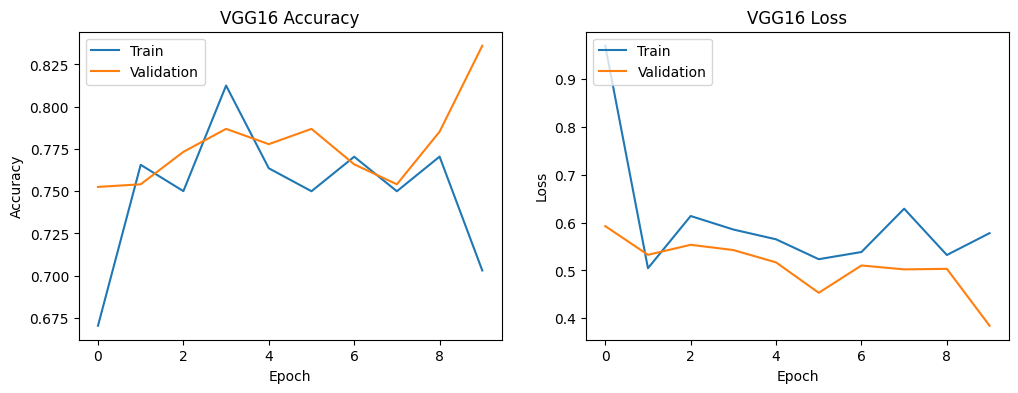

In [21]:
# Plot history for VGG16
plot_history(history_vgg16,'VGG16')

In [ ]:
model.summary()

In [22]:
# Save the VGG16 model
model.save('Vgg16_Brackish(79.62%).h5')